![image.jpeg](PlayStore.jpeg)

## Analysis And Visualizations
**Remember the csv file you created in the last task ? Now it's time to use it for some analysis and visualizations**

**Note: each question will be answered into 2 parts first your analysis using pandas and then use visualizations to prove it**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("filteredplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free


### 11. Which app has the greatest number of reviews?

In [232]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #convert reviews to numerical
most_reviewed_app = df.loc[df['Reviews'].idxmax()]
print(most_reviewed_app)


App                         Facebook
Category                      SOCIAL
Rating                           4.1
Reviews                   78158306.0
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                            0.0
Content Rating                  Teen
Genres                        Social
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Distribution                    Free
Name: 2544, dtype: object


In [3]:
top_apps = df.nlargest(10, 'Reviews')
#plot data
plt.figure(figsize=(10, 5))
plt.bar(top_apps['App'], top_apps['Reviews'], color='mediumseagreen')
plt.xlabel('Number of Reviews')
plt.ylabel('App Name')
plt.title('Top 10 Apps with the Most Reviews')
plt.show()

TypeError: Column 'Reviews' has dtype object, cannot use method 'nlargest' with this dtype

### 12. What Category Has the Highest Number of Apps Uploaded to the Store?

Get the specific category that contains the most significant number of uploaded applications.

In [5]:
category_counts = df['Category'].value_counts()
most_popular_category = category_counts.idxmax()
max_count = category_counts.max()
# Display the result
print(f"The category with the most reviewed apps is '{most_popular_category}' with {max_count} apps.")


The category with the most reviewed apps is 'FAMILY' with 1972 apps.


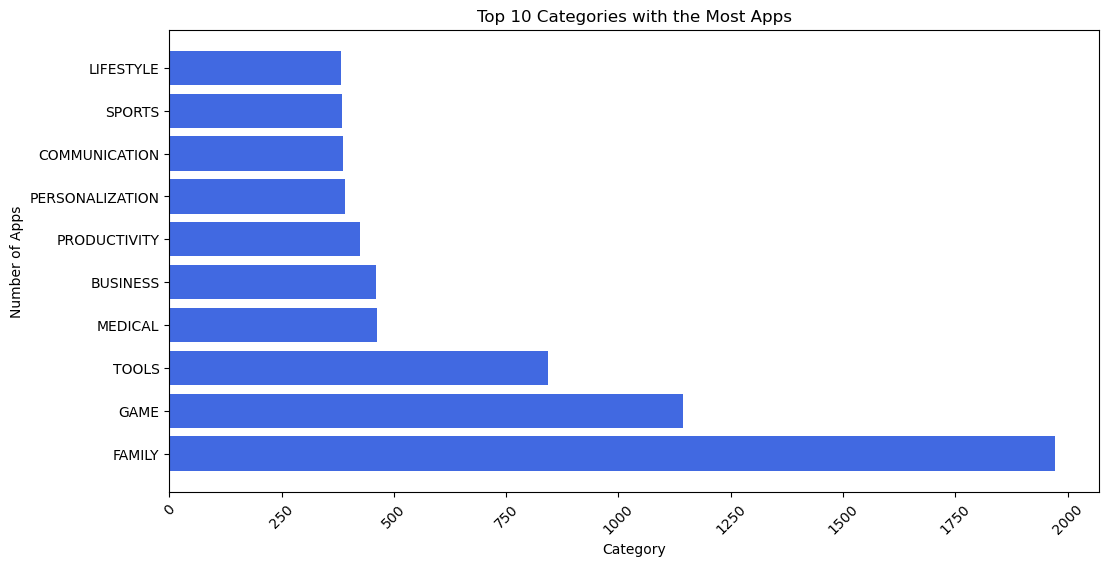

In [236]:
#visualization
# Get the top 10 most common categories
top_categories = category_counts.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_categories.index, top_categories.values, color='royalblue')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Top 10 Categories with the Most Apps')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.show()

### 13. To Which Category Belongs the Most Expensive App?

In [238]:
# Convert 'Price' column to numeric (assuming price is stored as a string with '$')
df['Price'] = df['Price'].replace('$', '', regex=True).astype(float)

# Find the most expensive app
most_expensive_app = df.loc[df['Price'].idxmax()]

#to get the category of most expensive app
most_expensive_category=most_expensive_app['Category']
app_name = most_expensive_app['App'] #name of it
app_price = most_expensive_app['Price']
print(f"category of most expensive app is {most_expensive_category} with price {app_price} dollars")

category of most expensive app is LIFESTYLE with price 400.0 dollars


C:\Users\Yanni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


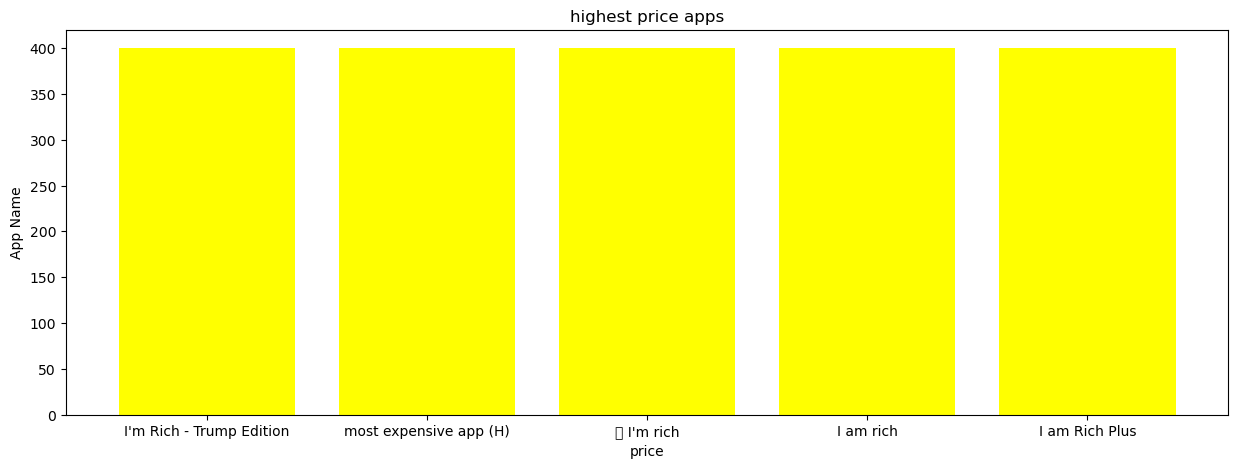

In [7]:
#plot data
top_expensive_apps= df.nlargest(5,'Price')
plt.figure(figsize=(15, 5))
plt.bar(top_expensive_apps['App'], top_expensive_apps['Price'], color='yellow')
plt.xlabel('price')
plt.ylabel('App Name')
plt.title('highest price apps')
plt.show()

### 14. What's the Name of the Most Expensive Game?

Find the most expensive app in the Game category and enter its name.

In [9]:

# Filter only the "Game" category
game_apps = df[df['Category'].str.lower() == 'game']  # Ensure case consistency
# Check if there are any games before proceeding
if not game_apps.empty:
    most_expensive_game = game_apps.loc[game_apps['Price'].idxmax()]
    most_expensive_game_name = most_expensive_game['App']
    print(f"The most expensive game app is: {most_expensive_game_name}")
else:
    print("No games found in the dataset.")


The most expensive game app is: The World Ends With You


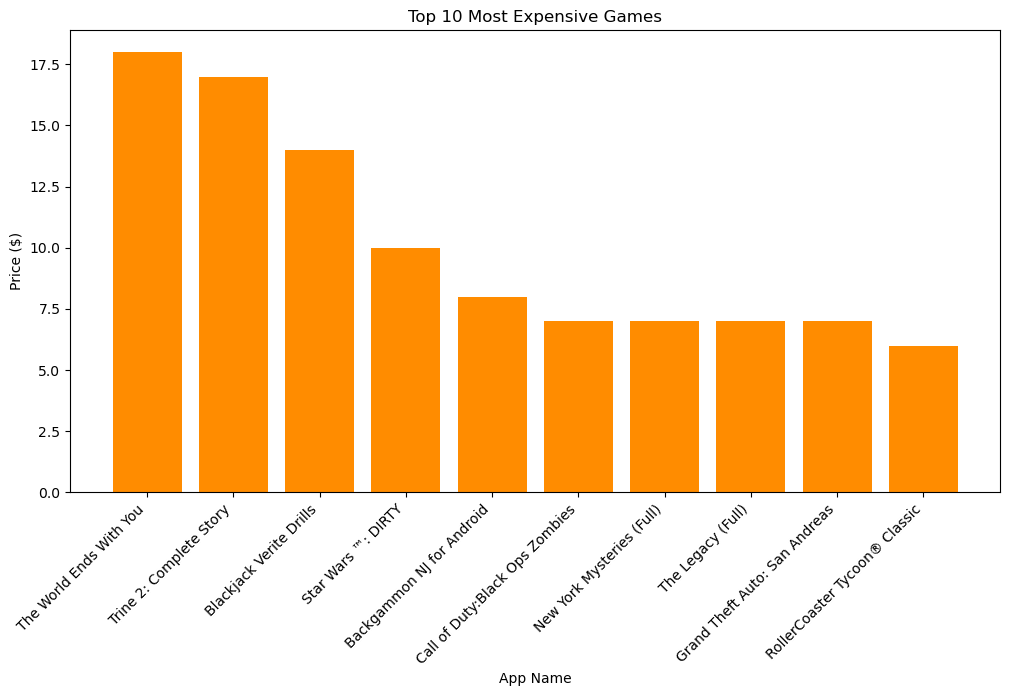

In [11]:

top_expensive_games = game_apps.nlargest(10, 'Price')

plt.figure(figsize=(12, 6))
plt.bar(top_expensive_games['App'], top_expensive_games['Price'], color='darkorange')
plt.xlabel('App Name')
plt.ylabel('Price ($)')
plt.title('Top 10 Most Expensive Games')
plt.xticks(rotation=45, ha='right')
plt.show()


### 15. Which Is the Most Popular Finance App?

What app (from the Finance category) has the most installs?

In [13]:
# Ensure 'Installs' is a string, then remove '+' and ',' before converting to numeric
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)

# Convert 'Installs' to numeric (handling errors safely)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')



category_finance = df[df['Category'].str.lower() == 'finance']

# Find the most installed finance app
if not category_finance.empty:
    most_installed_app = category_finance.loc[category_finance['Installs'].idxmax()]
    print(f"The most popular finance app is: {most_installed_app['App']} with {most_installed_app['Installs']} installs.")
else:
    print("No finance apps found in the dataset.")

The most popular finance app is: Google Pay with 100000000.0 installs.


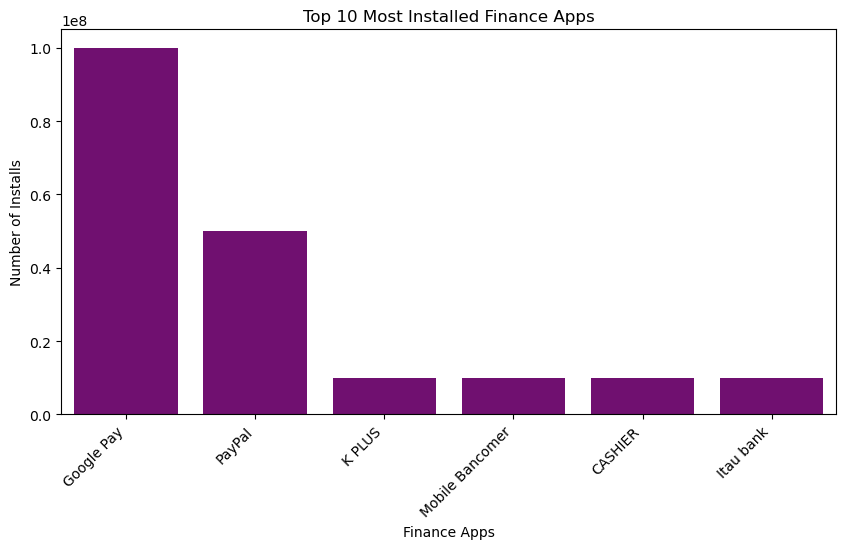

In [15]:
top_finance_apps = category_finance.nlargest(10, 'Installs')

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=top_finance_apps['App'], y=top_finance_apps['Installs'], color='Purple')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Finance Apps')
plt.ylabel('Number of Installs')
plt.title('Top 10 Most Installed Finance Apps')
plt.show()

### 16. What Teen Game Has the Most Reviews?

What app from the Game category and catalogued as Teen in Content Rating has the most reviews?

In [19]:
# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Standardize 'Category' and 'Content Rating'
df['Category'] = df['Category'].astype(str).str.strip().str.lower()
df['Content Rating'] = df['Content Rating'].astype(str).str.strip().str.lower()

# Filter only "Game" category with "Teen" content rating
teen_games = df[(df['Category'] == 'game') & (df['Content Rating'] == 'teen')]

# Get the Teen game with the most reviews
most_reviewed_teen_game = teen_games.loc[teen_games['Reviews'].idxmax()] if not teen_games.empty else None

# Print the result
if most_reviewed_teen_game is not None:
    print(f"The Teen-rated game with the most reviews is: {most_reviewed_teen_game['App']} with {most_reviewed_teen_game['Reviews']} reviews.")
else:
    print("No Teen-rated games found in the dataset.")


The Teen-rated game with the most reviews is: Asphalt 8: Airborne with 8389714.0 reviews.


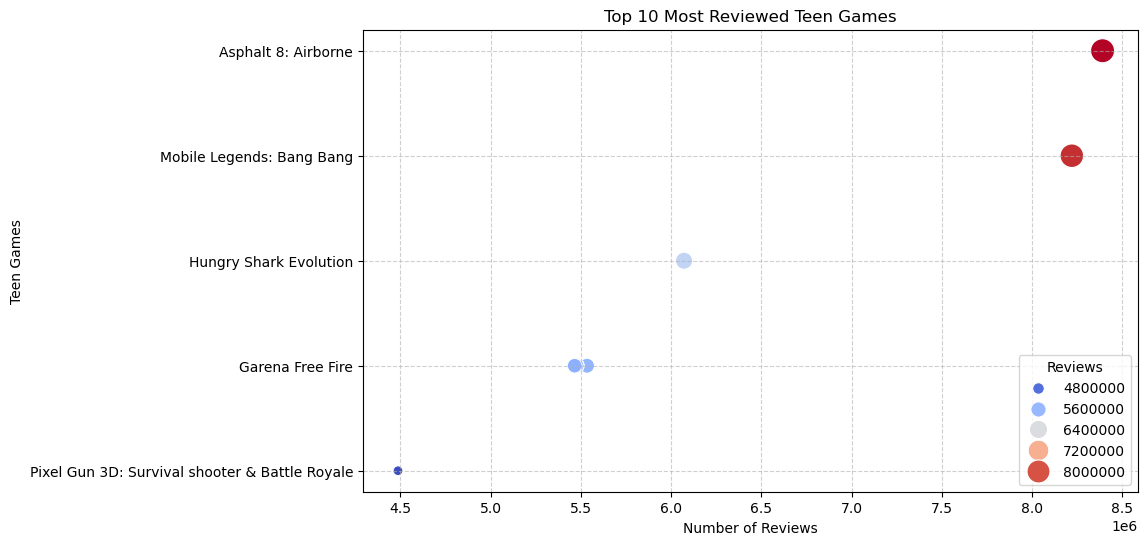

In [21]:
df['Content Rating'] = df['Content Rating'].astype(str).str.strip().str.lower()

# Filter only "Game" category with "Teen" content rating
teen_games = df[(df['Category'] == 'game') & (df['Content Rating'] == 'teen')]

# Get top 10 most reviewed Teen games
top_teen_games = teen_games.nlargest(10, 'Reviews')

# Visualization using Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_teen_games['Reviews'], y=top_teen_games['App'], size=top_teen_games['Reviews'], hue=top_teen_games['Reviews'], palette='coolwarm', sizes=(50, 300))

plt.xlabel('Number of Reviews')
plt.ylabel('Teen Games')
plt.title('Top 10 Most Reviewed Teen Games')
plt.legend(title='Reviews', loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

### 17. Which Is the Free Game with the Most Reviews?

 Get the name of the free game app with the most reviews.

In [23]:
# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Standardize 'Category' and 'Type' columns
df['Category'] = df['Category'].astype(str).str.strip().str.lower()
df['Type'] = df['Type'].astype(str).str.strip().str.lower()

# Filter only "Game" category and "Free" type
free_games = df[(df['Category'] == 'game') & (df['Type'] == 'free')]

# Get the free game with the most reviews
most_reviewed_free_game = free_games.loc[free_games['Reviews'].idxmax()] if not free_games.empty else None

# Print the result
if most_reviewed_free_game is not None:
    print(f"The free game with the most reviews is: {most_reviewed_free_game['App']} with {most_reviewed_free_game['Reviews']} reviews.")
else:
    print("No free games found in the dataset.")


The free game with the most reviews is: Clash of Clans with 44893888.0 reviews.


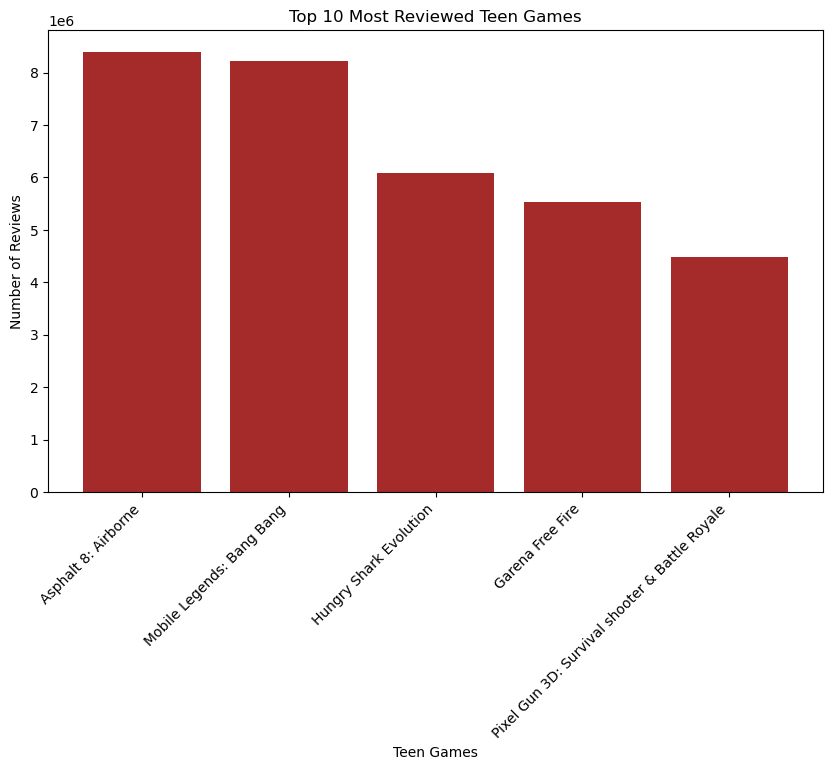

In [25]:

# Get the top 10 most reviewed Teen games
top_teen_games = teen_games.nlargest(10, 'Reviews')

# Visualization using Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top_teen_games['App'], top_teen_games['Reviews'], color='brown')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel('Teen Games')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Most Reviewed Teen Games')

plt.show()


### 18. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?

This app produced the greatest amount of bytes transfer. Enter your answer in Tebibytes as a whole number (rounding down to the nearest integer). Example, if you find the total transfer to be 780.9581 Tb, just enter 780.

- Find the total size by multiplying size of the app with total installs and convert the result into TB.

In [27]:


# Convert 'Installs' to numeric
df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True).astype(float)

# Function to convert 'Size' column into bytes
def convert_size(size):
    size = str(size).lower().strip()
    if 'm' in size:  # Megabytes
        return float(size.replace('m', '')) * (2**20)
    elif 'k' in size:  # Kilobytes
        return float(size.replace('k', '')) * (2**10)
    elif 'g' in size:  # Gigabytes
        return float(size.replace('g', '')) * (2**30)
    else:
        return np.nan  # Return NaN for missing or unknown sizes

# Apply size conversion
df['Size'] = df['Size'].apply(convert_size)

# Ensure 'Size' is a float column
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Filter for Lifestyle category
lifestyle_apps = df[df['Category'].str.lower() == 'lifestyle']

# Drop rows where 'Size' or 'Installs' is NaN
lifestyle_apps = lifestyle_apps.dropna(subset=['Size', 'Installs'])

 # Find the most installed Lifestyle app
most_installed_lifestyle_app = lifestyle_apps.loc[lifestyle_apps['Installs'].idxmax()]

 # Convert 'Size' to float again (extra safety)
 app_size = float(most_installed_lifestyle_app['Size'])
app_installs = float(most_installed_lifestyle_app['Installs'])

# Calculate total bytes transferred
total_bytes = app_size * app_installs

# Convert bytes to Tebibytes (1 TiB = 2^40 bytes)s
total_tib = total_bytes / (2**40)

# Round down to the nearest integer
final_tib = int(total_tib)

# Print results
print(f"The most popular Lifestyle app is: {most_installed_lifestyle_app['App']}")
print(f"Total data transferred: {final_tib} TiB")



The most popular Lifestyle app is: Tinder
Total data transferred: 6484 TiB
